In [19]:
import pandas as pd
import numpy as np
import psycopg2
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [20]:
#os.getcwd()

In [21]:
os.listdir()

['.ipynb_checkpoints', 'london-clean.csv', 'Untitled.ipynb']

In [22]:
df = pd.read_csv("london-clean.csv")

In [23]:
df.head(3)

,id,downo,daytype,SubSystem,StartStn,EndStn,EntTime,ExTime,Zones,JourneyType,DailyCapping,FullFare,DiscountFare,FinalProduct,JourneyTime,Gender,Product line,Unit price,Quantity,Rating
0,46006,6,Fri,LUL/NR,Walthamstow Central,Arsenal,1000,1017,-------,PPY,N,55,55,PAYG,17,Female,Health and beauty,74.69,7.0,9.1
1,46048,3,Tue,DLR,All Saints,Cutty Sark,1000,1020,-------,PPY,N,110,110,PAYG,20,Female,Electronic accessories,15.28,5.0,9.6
2,46060,5,Thu,LUL/DLR,Woolwich Arsenal DLR,Hounslow West,1000,1086,-------,PPY,N,370,370,PAYG,86,Male,Home and lifestyle,46.33,7.0,7.4


In [24]:
df.isna().sum()

id                  0
downo               0
daytype             0
SubSystem           0
StartStn            0
EndStn              0
EntTime             0
ExTime              0
Zones               0
JourneyType         0
DailyCapping        0
FullFare            0
DiscountFare        0
FinalProduct        0
JourneyTime         0
Gender              0
Product line        0
Unit price      82090
Quantity        82090
Rating          82090
dtype: int64

In [25]:
df.isnull().sum()

id                  0
downo               0
daytype             0
SubSystem           0
StartStn            0
EndStn              0
EntTime             0
ExTime              0
Zones               0
JourneyType         0
DailyCapping        0
FullFare            0
DiscountFare        0
FinalProduct        0
JourneyTime         0
Gender              0
Product line        0
Unit price      82090
Quantity        82090
Rating          82090
dtype: int64

In [26]:
df.describe()

,id,downo,EntTime,ExTime,FullFare,DiscountFare,JourneyTime,Unit price,Quantity,Rating
count,8.409000e+04,84090.000000,84090.000000,84090.000000,84090.000000,84090.000000,84090.000000,2000.000000,2000.000000,2000.00000
mean,1.228591e+06,4.127554,823.567594,855.780224,96.732489,95.015995,32.212629,55.672130,5.510000,6.97270
std,7.325235e+05,1.684775,283.859784,284.279214,109.118051,108.559210,17.237159,26.488001,2.922699,1.71815
min,4.600600e+04,1.000000,281.000000,309.000000,0.000000,0.000000,1.000000,10.080000,1.000000,4.00000
25%,5.627132e+05,3.000000,528.000000,559.000000,0.000000,0.000000,19.000000,32.875000,3.000000,5.50000
50%,1.214764e+06,4.000000,861.000000,893.000000,110.000000,110.000000,29.000000,55.230000,5.000000,7.00000
75%,1.791447e+06,6.000000,1063.000000,1096.000000,160.000000,160.000000,42.000000,77.935000,8.000000,8.50000
max,2.623405e+06,7.000000,1499.000000,1518.000000,700.000000,700.000000,162.000000,99.960000,10.000000,10.00000


In [27]:
for i in df.columns:
    print(i)

id
downo
daytype
SubSystem
StartStn
EndStn
EntTime
ExTime
Zones
JourneyType
DailyCapping
FullFare
DiscountFare
FinalProduct
JourneyTime
Gender
Product line
Unit price
Quantity
Rating


In [28]:
df.shape

(84090, 20)

In [29]:
df.info

<bound method DataFrame.info of             id  downo daytype   SubSystem              StartStn  \
0        46006      6     Fri      LUL/NR   Walthamstow Central   
1        46048      3     Tue         DLR            All Saints   
2        46060      5     Thu     LUL/DLR  Woolwich Arsenal DLR   
3        46065      4     Wed      LUL/NR         Putney Bridge   
4        46104      2     Mon         DLR          Shadwell DLR   
...        ...    ...     ...         ...                   ...   
84085  2623149      5     Thu      NR/LRC     Kentish Town West   
84086  2623161      4     Wed     LUL/LRC          Aldgate East   
84087  2623234      7     Sat  LUL/NR/LRC          Canning Town   
84088  2623297      5     Thu      NR/LRC       Hackney Central   
84089  2623405      4     Wed     LUL/DLR           Heron Quays   

                     EndStn  EntTime  ExTime    Zones JourneyType  \
0                   Arsenal     1000    1017  -------         PPY   
1                Cutty Sa

In [30]:
df.nunique()

id              84090
downo               7
daytype             7
SubSystem          13
StartStn          407
EndStn            408
EntTime          1193
ExTime           1188
Zones              23
JourneyType         3
DailyCapping        2
FullFare           47
DiscountFare       68
FinalProduct       13
JourneyTime       141
Gender              2
Product line        6
Unit price        943
Quantity           10
Rating             61
dtype: int64

In [31]:
df.duplicated().sum()

0

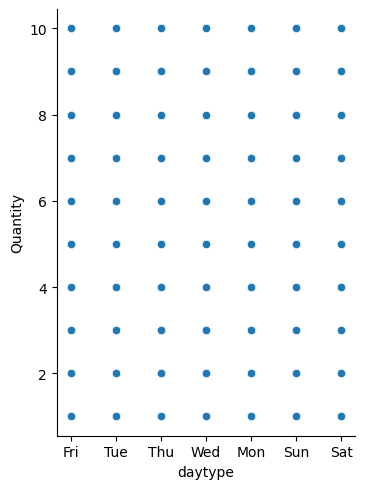

In [35]:
sns.relplot(
    data= df,
    x='daytype', y='Quantity',
    height=5, aspect=.75, facet_kws=dict(sharex=False),
    kind='scatter',

)
